# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | san luis de la loma
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | tolanaro
Processing Record 8 of Set 1 | cable beach
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | arkhangel'sk
Processing Record 11 of Set 1 | san andres
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | borkum
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | al kharijah
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | ti

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,11.01,76,75,0.00,GL,1689808791
1,albany,42.6001,-73.9662,26.05,58,20,1.27,US,1689808272
2,west island,-12.1568,96.8225,24.99,83,75,5.14,CC,1689808791
3,vorgashor,67.5833,63.9500,16.51,81,84,2.21,RU,1689808792
4,san luis de la loma,17.2706,-100.8939,31.39,65,63,3.63,MX,1689808792


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,11.01,76,75,0.00,GL,1689808791
1,albany,42.6001,-73.9662,26.05,58,20,1.27,US,1689808272
2,west island,-12.1568,96.8225,24.99,83,75,5.14,CC,1689808791
3,vorgashor,67.5833,63.9500,16.51,81,84,2.21,RU,1689808792
4,san luis de la loma,17.2706,-100.8939,31.39,65,63,3.63,MX,1689808792


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

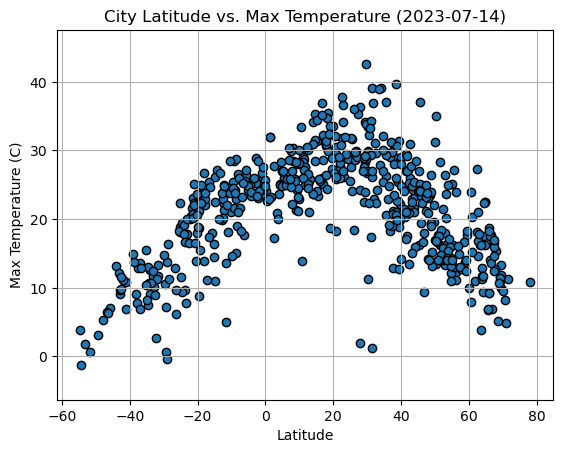

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x, y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-07-14)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.ylim(min(y) - 5, max(y) + 5)
plt.grid("show")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

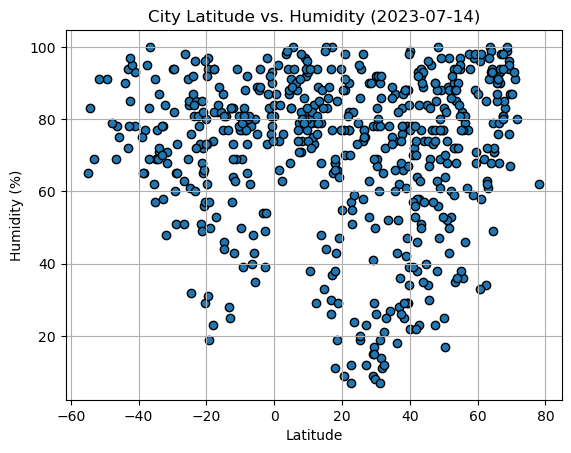

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x, y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-14)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid("show")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

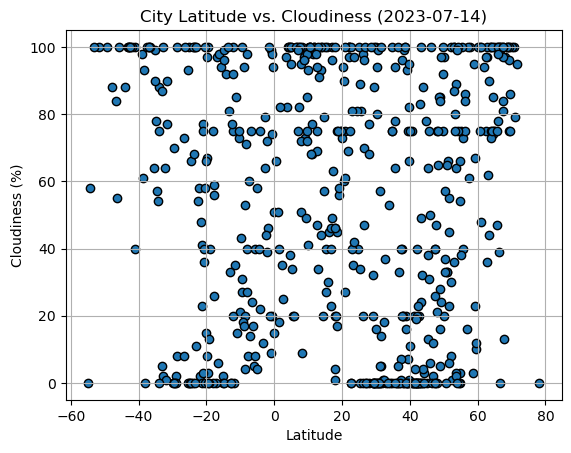

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x, y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-14)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid("show")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

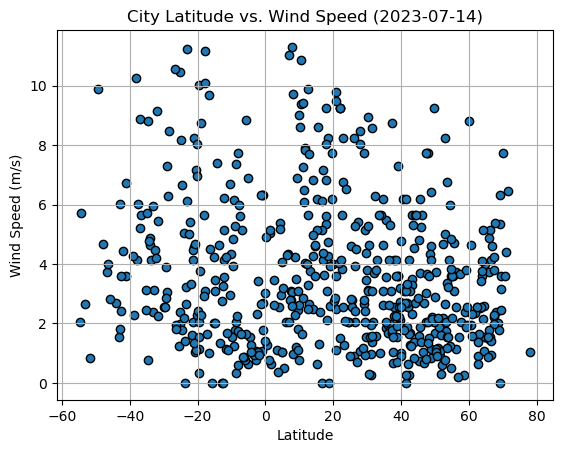

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x, y, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-14)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid("show")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def LinRegressionPlots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")

    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,11.01,76,75,0.00,GL,1689808791
1,albany,42.6001,-73.9662,26.05,58,20,1.27,US,1689808272
3,vorgashor,67.5833,63.9500,16.51,81,84,2.21,RU,1689808792
4,san luis de la loma,17.2706,-100.8939,31.39,65,63,3.63,MX,1689808792
7,bethel,41.3712,-73.4140,27.05,72,20,0.00,US,1689808608


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,24.99,83,75,5.14,CC,1689808791
5,mar del plata,-38.0023,-57.5575,7.75,77,0,4.12,AR,1689808793
6,tolanaro,-25.0319,46.9987,18.88,84,0,1.98,MG,1689808793
11,waitangi,-43.9535,-176.5597,13.23,90,88,2.68,NZ,1689808796
13,port-aux-francais,-49.3500,70.2167,3.09,91,100,9.87,TF,1689808796


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4006603138549622
The correlation between both factors is -0.63


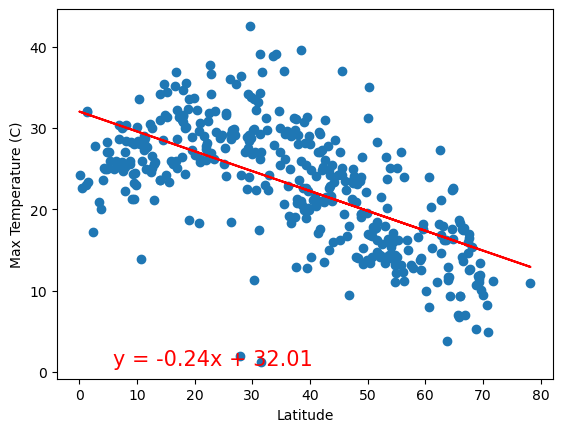

In [41]:
# Linear regression on Northern Hemisphere
LinRegressionPlots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

The r-squared is: 0.65762725270532
The correlation between both factors is 0.81


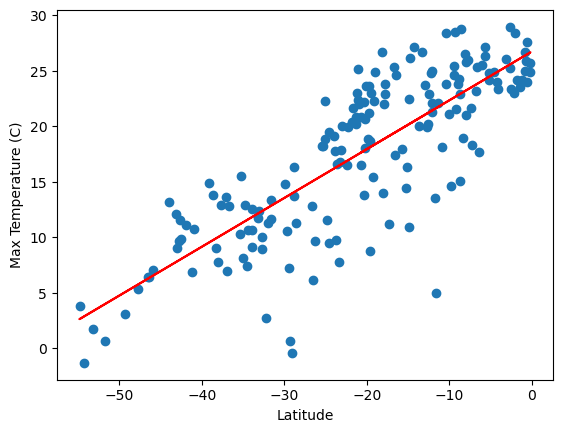

In [42]:
# Linear regression on Southern Hemisphere
LinRegressionPlots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

**Discussion about the linear relationship:** 
- In the Northern Hemisphere, Approximately 33% of the variation of Max Temp cant be explained by Latitude in the regression model.
- The Northern Hemisphere region had a moderate negative correlation between Max Temp and Latitude.
- In the Southern Hemisphere, Approximately 64% of the variation of Max Temp cant be explained by Latitude in the regression model.
- The Northern Hemisphere region had a strong positive correlation between Max Temp and Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.004077118841273631
y = 0.08x + 67.2
The correlation between both factors is 0.06


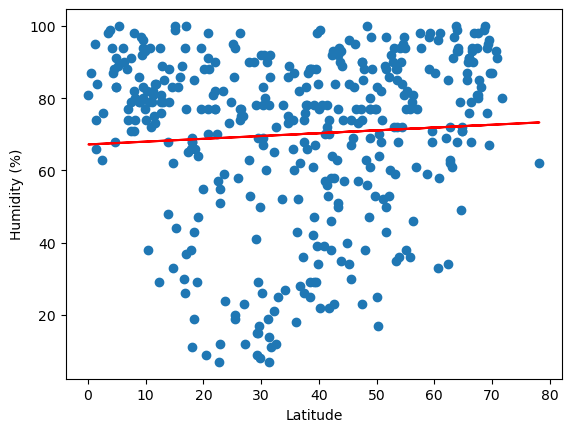

In [19]:
# Northern Hemisphere
LinRegressionPlots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-squared is: 0.014689979170816544
y = -0.16x + 69.65
The correlation between both factors is -0.12


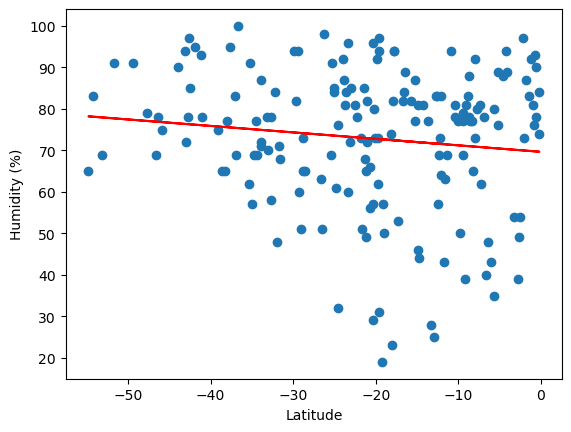

In [20]:
# Southern Hemisphere
LinRegressionPlots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** 
- Latitude and Humidity % had a very high level of variability and there does not seem to be correlation between these two variables.
- In the Northern Hemisphere region, there is some clusters above 65% humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0010728300295987684
y = -0.06x + 56.9
The correlation between both factors is -0.03


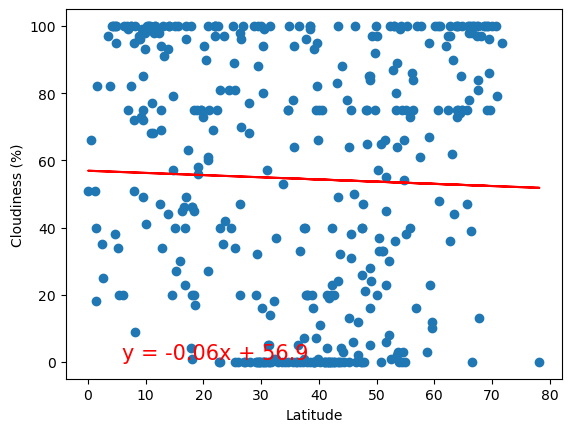

In [21]:
# Northern Hemisphere
LinRegressionPlots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-squared is: 0.06102158203421118
y = -0.71x + 37.34
The correlation between both factors is -0.25


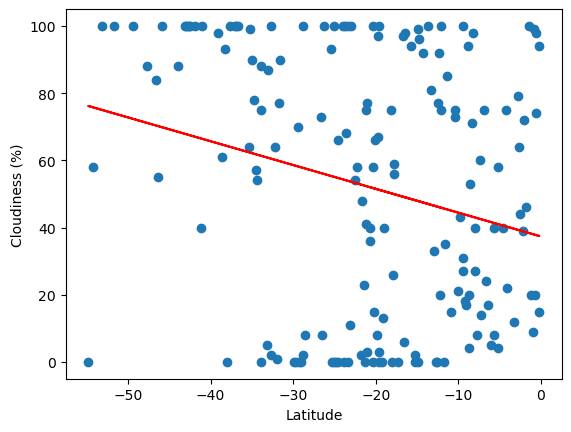

In [22]:
# Southern Hemisphere
LinRegressionPlots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** 
- Latitude and Cloudiness % had a very high level of variability and there does not seem to be correlation between these two variables.
- In the Northern Hemisphere region, there is some clusters along 0% and 100% cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.056142964540954715
y = -0.03x + 4.53
The correlation between both factors is -0.24


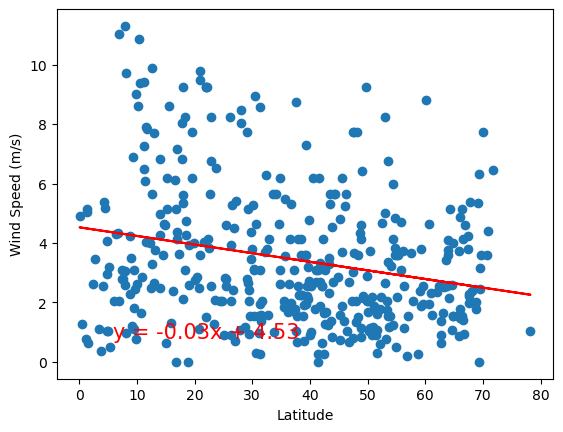

In [23]:
# Northern Hemisphere
LinRegressionPlots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-squared is: 0.036199774461097366
y = -0.04x + 3.09
The correlation between both factors is -0.19


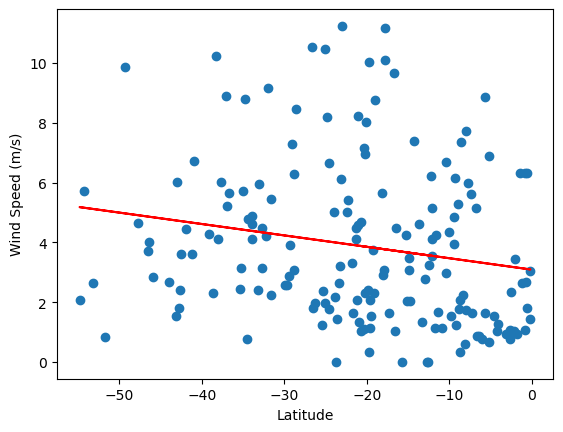

In [24]:
# Southern Hemisphere
LinRegressionPlots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:
- Latitude and Wind Speed has a high level of variability and there seems to be very none to very weak correlation between these two variables.
- We can see that majority of the data points and clusters are located in the Northern Hemisphere and particularly with wind speeds below 4 m/s.